<a href="https://colab.research.google.com/github/multiopti/MYWAI/blob/main/measuring_period.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sys
import os
!{sys.executable} -m pip install wget
import wget
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

print('Beginning file download with wget module')

#downloading Mafaulda database, normal samples
url = 'http://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/normal.zip'
wget.download(url, './')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Beginning file download with wget module


'.//normal (1).zip'

In [2]:
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('normal.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
    

In [3]:
for i in os.listdir('./'):
    print(i)

.config
normal
normal.zip
normal (1).zip
sample_data


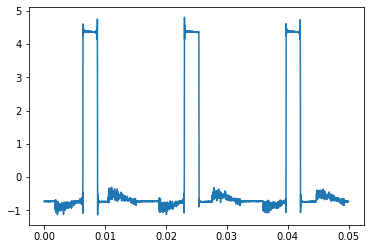

In [4]:
filename = './normal/61.44.csv'
Fs = 50000

x = np.genfromtxt(filename,delimiter=',')
#select signal
x = x[:,0]
# remove DC component
x = x - np.mean(x)

if len(x) % 2 != 0:
  x = x[:-1]
Nsam = len(x)
t = np.arange(Nsam)
t = (1/Fs)*t
plt.plot(t[0:2500],x[0:2500])
plt.show()



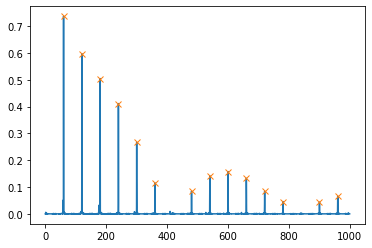

In [5]:
# apply window

w = signal.get_window('hamming', Nsam)
x = np.multiply(x,w)

# FFT 
X = np.fft.fft(x)
Xn = np.sqrt(X.real*X.real + X.imag*X.imag)
xf = np.fft.fftfreq(Nsam, 1/Fs)
        
Xn = Xn[0:Nsam//2]
Xn = (2/Nsam)*Xn
xf = xf[0:Nsam//2]

peaks, _ = find_peaks(Xn[0:5000],height=0.01,distance=50 )

plt.plot(xf[0:5000],Xn[0:5000])
plt.plot(xf[peaks], Xn[peaks], "x")
plt.show()

In [6]:
print('Period(ms) is approx: ',1000/xf[peaks][0])

Period(ms) is approx:  16.666666666666668
